In [1]:
!pip install keras-tuner

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set()
from sklearn.ensemble import IsolationForest # Outlier Detection
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense
from keras.callbacks import EarlyStopping # Early Stopping Callback
from keras.optimizers import Adam # Optimizer
from keras_tuner.tuners import RandomSearch # HyperParameter Tuning
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [45]:
country_vs_life = df.groupby('Country', as_index=False)['Life expectancy '].mean()
country_vs_life.sort_values(by='Life expectancy ', ascending=False).head(25)

,Country,Life expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [46]:
country_vs_life.sort_values(by='Life expectancy ', ascending=True).head(25)

,Country,Life expectancy
152,Sierra Leone,46.11250
31,Central African Republic,48.51250
94,Lesotho,48.78125
3,Angola,49.01875
100,Malawi,49.89375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.48750
164,Swaziland,51.32500
123,Nigeria,51.35625


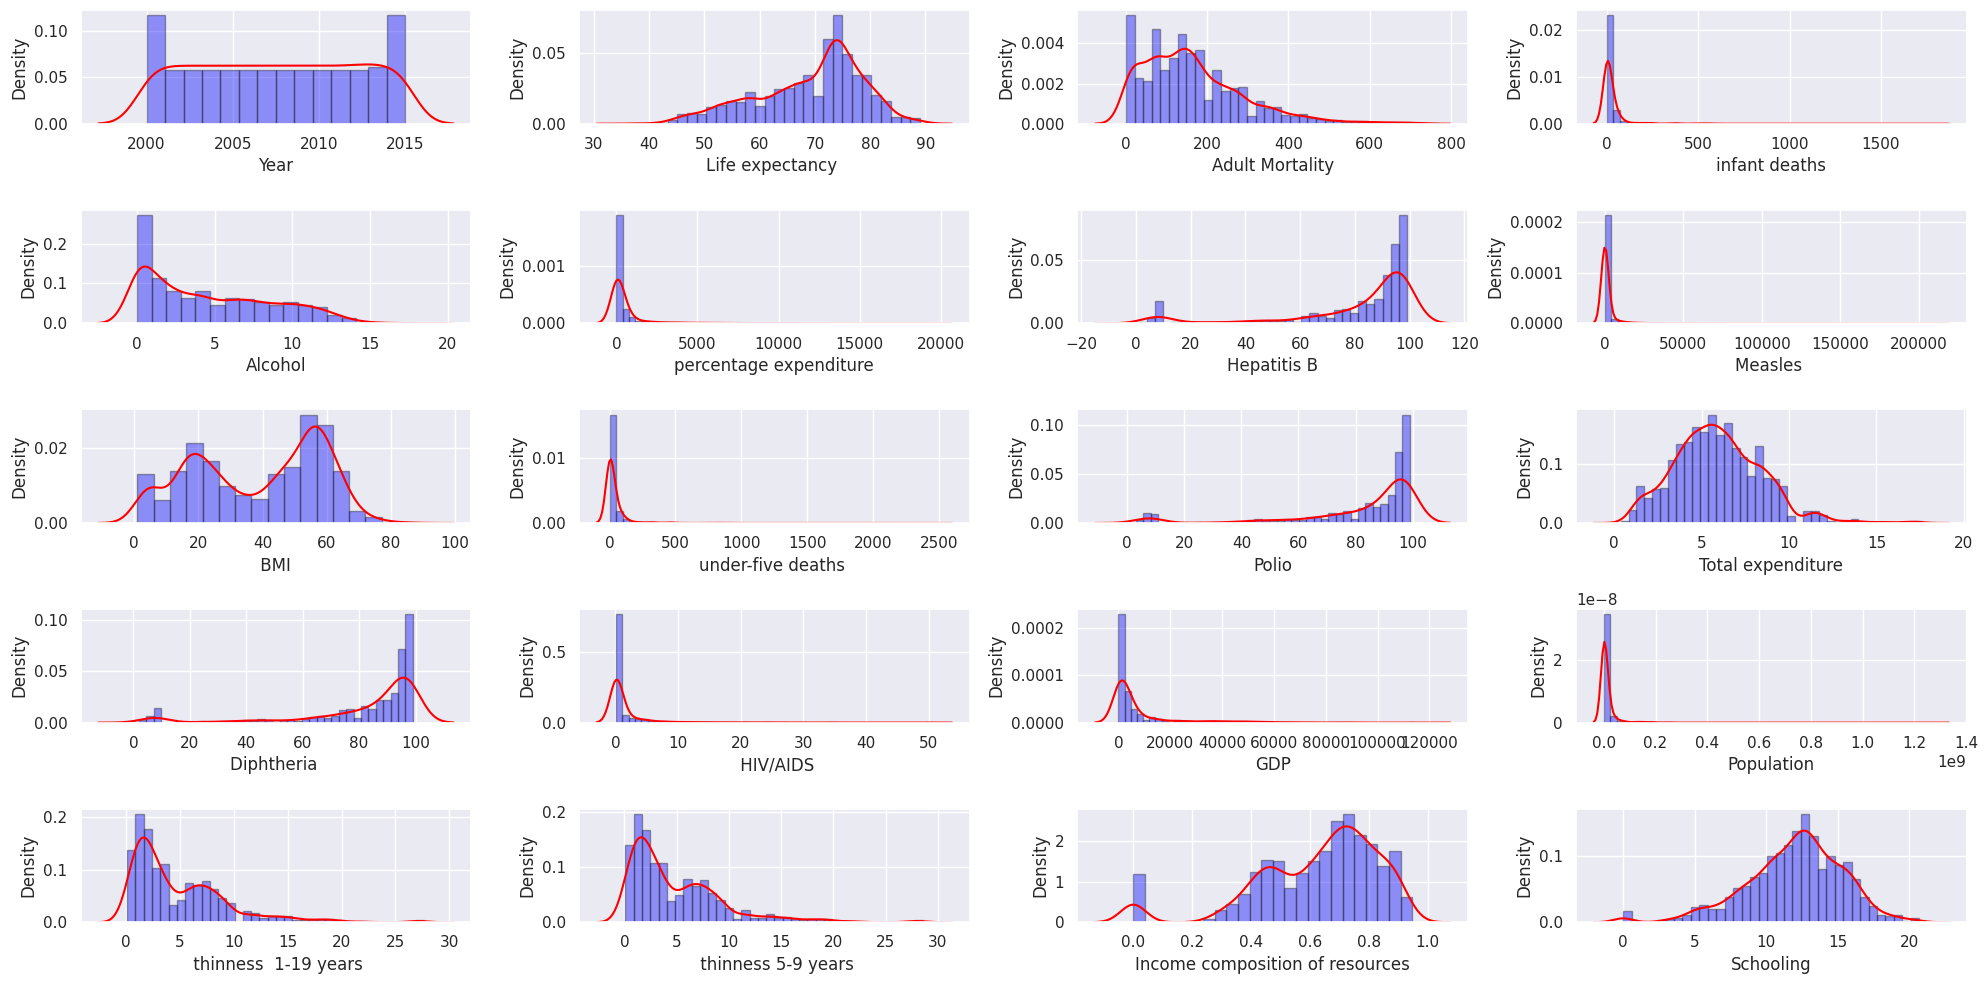

In [47]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

count = 1

fig = plt.figure(figsize = [20, 10])
cols = df.select_dtypes(exclude=['object']).columns.tolist()

for col in cols:
    plt.subplot(5, 4, count)
    sns.distplot(df[col], hist_kws=dict(edgecolor="k", linewidth=1, color='blue'), color='red')
    count += 1
plt.tight_layout()
plt.show()



In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [49]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [11]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [76]:
X = df.copy()
X.drop(['Life expectancy ', 'Country', 'Status'], axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Adult Mortality                  2928 non-null   float64
 2   infant deaths                    2938 non-null   int64  
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6   Measles                          2938 non-null   int64  
 7    BMI                             2904 non-null   float64
 8   under-five deaths                2938 non-null   int64  
 9   Polio                            2919 non-null   float64
 10  Total expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12   HIV/AIDS           

In [77]:
y = df['Life expectancy ']
y.head()

,Life expectancy
0,65.0
1,59.9
2,59.9
3,59.5
4,59.2


In [126]:
# Splitting into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
#y_train = pd.DataFrame(y_train)
#y_test = pd.DataFrame(y_test)

In [81]:
#y_test = y_test.reindex(columns=y_train.columns, fill_value=0)

In [82]:
#numerical_features = X.select_dtypes(include=['float64', 'int64'])
#numerical_columns = numerical_features.columns

In [83]:
#ct = ColumnTransformer([("only numeric", StandardScaler(), numerical_columns)], remainder='passthrough')

In [84]:
#X_train_scaled = ct.fit_transform(X_train)
#X_test_scaled = ct.transform(X_test)

In [107]:
import tensorflow as tf
from keras.models import Sequential # Sequential Neural Network
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping # Early Stopping Callback
from keras.optimizers import Adam # Optimizer
from keras_tuner.tuners import RandomSearch # HyperParameter Tuning

# Teste

In [127]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
  # Camada de saída para regressão
model.compile(loss='mean_squared_error', optimizer='adam')

In [128]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: nan - val_loss: nan
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 9/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 10/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - val_loss: nan
Epoch 11/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - val_loss: nan
Epoch 12/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 13/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

## 1 Try

In [123]:
model = Sequential([
    Flatten(input_shape=(19,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

In [124]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mse',  # Loss function for regression
)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: nan - val_loss: nan
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: nan - val_loss: nan
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 10: early stopping


<Axes: >

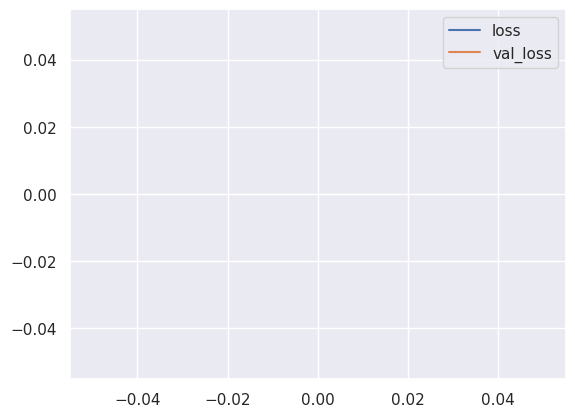

In [125]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(
    x=X_train_scaled,
    y=y_train,
    validation_data=(X_test_scaled, y_test),  # Pass validation data here
    batch_size=128,
    epochs=100,
    callbacks=[early_stop]
)

losses = pd.DataFrame(model.history.history)
losses.plot()

In [100]:
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 19)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,789 (151.52 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,860 (101.02 KB)

None


## 2 Try

In [113]:
model = Sequential([
    Flatten(input_shape=(19,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

In [114]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='mse',  # Loss function for regression
)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: nan - val_loss: nan
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - val_loss: nan
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - val_loss: nan
Epoch 10: early stopping


<Axes: >

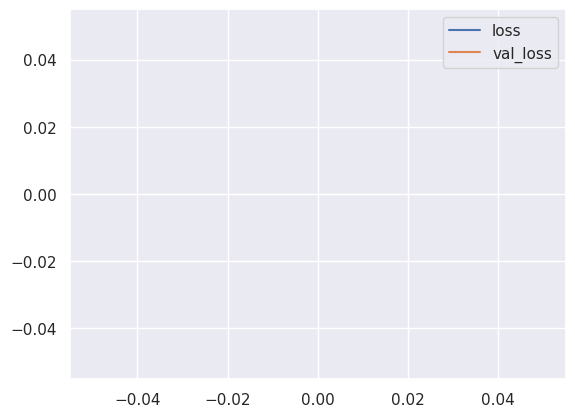

In [115]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
history = model.fit(x = X, y = y,
      validation_split=0.1,
      batch_size=128,
      epochs=100,
      callbacks=[early_stop])
losses = pd.DataFrame(model.history.history)
losses.plot()